# Medical Practice Database
## Database Course Final Project Part 2
## Code version of 31March2023
## Alex Bordanca & David Thiriot

## Create SQLite database

In [1]:
import sqlite3
import pandas as pd

In [2]:
from pathlib import Path
Path('MedPracDB.db').touch()
# David Thiriot

#reference: https://mungingdata.com/sqlite/create-database-load-csv-python/
# This is a way to create an empty new .db file as a starting point

In [3]:
# David Thiriot

conn = sqlite3.connect('MedPracDB.db')
c = conn.cursor()

In [4]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Doctors''')
c.execute('''CREATE TABLE Doctors (Doctor_ID int PRIMARY KEY , 
                                   Firstname text,      
                                   Lastname text)''') 
doctors_table = pd.read_csv('doctors table.csv', header=0)      
doctors_table.to_sql('Doctors', conn, if_exists='append', index=False)

10

In [5]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Patient_contact''')
c.execute('''CREATE TABLE Patient_contact (Patient_ID int PRIMARY KEY,
                                           Email text,
                                           Street_address text,
                                           City text,
                                           State text,
                                           Zip int)''')
patient_contact_table = pd.read_csv('patient contact table.csv', header=0)
patient_contact_table.to_sql('Patient_contact', conn, if_exists='append', index=False)

1000

In [6]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Patient_finance''')
c.execute('''CREATE TABLE Patient_finance (Patient_ID int PRIMARY KEY,
                                           Amount_due real,
                                           Ins_co text)''')
patient_finance_table = pd.read_csv('patient finance table.csv', header=0)
patient_finance_table.to_sql('Patient_finance', conn, if_exists='append', index=False)

1000

In [7]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Patient_doctors''')
c.execute('''CREATE TABLE Patient_doctors (Patient_ID int PRIMARY KEY,
                                           Doctor text NOT NULL)''')
patient_doctors_table = pd.read_csv('patient doctors table.csv', header=0)
patient_doctors_table.to_sql('Patient_doctors', conn, if_exists='append', index=False)

1000

In [8]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Patient_health''')
c.execute('''CREATE TABLE Patient_health (Patient_ID int PRIMARY KEY,
                                          Current_smoker int,
                                          Condition_1 int,
                                          Condition_2 int,
                                          Condition_3 int,
                                          Condition_4 int,
                                          Condition_5 int,
                                          Condition_6 int,
                                          Condition_7 int,
                                          Condition_8 int,
                                          Condition_9 int,
                                          Condition_10 int)''')
patient_health_table = pd.read_csv('patient health table.csv', header=0)
patient_health_table.to_sql('Patient_health', conn, if_exists='append', index=False)

1000

In [9]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Patient_ID''')  # Require at least 1 name.  That would go in the Firstname field.
c.execute('''CREATE TABLE Patient_ID (Patient_ID int PRIMARY KEY,
                                      Firstname text NOT NULL,
                                      Lastname text,
                                      DOB text,
                                      Age int, 
                                      Biol_sex text,
                                      Ethnicity text)''')
patient_ID_table = pd.read_csv('patient ID table.csv', header=0)
patient_ID_table.to_sql('Patient_ID', conn, if_exists='append', index=False)

1000

In [10]:
# David Thiriot

c.execute('''DROP TABLE IF EXISTS Patient_vitals''')
c.execute('''CREATE TABLE Patient_vitals (Patient_ID int PRIMARY KEY,
                                          Last_height real,
                                          Last_weight real,
                                          Last_heartrate real,
                                          Last_systolic_BP real,
                                          Last_diastolic_BP real)''')
patient_vitals_table = pd.read_csv('patient vitals table.csv', header=0)
patient_vitals_table.to_sql('Patient_vitals', conn, if_exists='append', index=False)

1000

In [11]:
# David Thiriot

c.execute('''SELECT * FROM Doctors''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df

,Doctor_ID,Firstname,Lastname
0,1,Michael,Smith
1,2,Sally,Williams
2,3,Dennis,Jones
3,4,Juana,Rodriguez
4,5,Li,Zhang
5,6,Ernesto,Perez
6,7,Veronica,Jackson
7,8,Patricia,Harris
8,9,Suleman,Tataryn
9,10,Alain,Petit


In [12]:
# David Thiriot

c.execute('''SELECT * FROM Patient_doctors''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Doctor
0,1,Zhang
1,2,Tataryn
2,3,Harris
3,4,Jones
4,5,Petit
5,6,Williams
6,7,Smith
7,8,Smith
8,9,Smith
9,10,Smith


In [13]:
# David Thiriot

c.execute('''SELECT * FROM Patient_contact''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Email,Street_address,City,State,Zip
0,1,YunPor5@gmail.com,872 Jakubowski Creek,New York,New York,10007
1,2,ColJal8@yahoo.com,347 Immanuel Mountains,New York,New York,10007
2,3,LigAus2@gmail.com,6040 Williamson Curve,New York,New York,10012
3,4,AliJor1@aol.com,93049 Audley Island,New York,New York,10006
4,5,DzeMer1@gmail.com,939 Nicolas Loaf Suite 330,New York,New York,10012
5,6,al-Bad5@verizon.net,4726 Warren Square Suite 033,New York,New York,10013
6,7,HriNat3@aol.com,7683 Connelly Knolls,New York,New York,10006
7,8,WatAle4@aol.com,684 Ivette Isle,New York,New York,10005
8,9,JohKia8@gmail.com,1373 Ancel Cape Suite 589,New York,New York,10012
9,10,RadTin7@gmail.com,124 Vicente Shores Suite 283,New York,New York,10002


In [14]:
# David Thiriot

c.execute('''SELECT * FROM Patient_finance''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Amount_due,Ins_co
0,1,400.0,CityPlan Health
1,2,0.0,MetroCare Basic
2,3,300.0,LifeWell
3,4,0.0,New Day Medical
4,5,0.0,Healthplan Plus
5,6,5300.0,Health Partners of New York
6,7,5700.0,Healthplan Plus
7,8,2000.0,LifeWell
8,9,300.0,LifeWell
9,10,2400.0,CityPlan Health


In [15]:
# David Thiriot

c.execute('''SELECT * FROM Patient_health''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Current_smoker,Condition_1,Condition_2,Condition_3,Condition_4,Condition_5,Condition_6,Condition_7,Condition_8,Condition_9,Condition_10
0,1,1,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0
5,6,0,0,1,0,0,0,0,0,1,0,0
6,7,0,0,1,1,0,0,0,0,1,0,0
7,8,0,0,0,0,0,0,1,0,0,0,0
8,9,0,0,1,0,0,0,0,0,0,0,0
9,10,0,0,0,1,0,0,1,0,0,0,0


In [16]:
# David Thiriot

c.execute('''SELECT * FROM Patient_ID''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Firstname,Lastname,DOB,Age,Biol_sex,Ethnicity
0,1,Porvangchee,Yun,1972-03-20,51,Male,Asian or Pacific Islander
1,2,Jalen,Collins,1948-06-15,75,Female,Black (not Hispanic)
2,3,Austin,Lightfoot,1964-09-10,59,Male,American Indian or Native Alaskan
3,4,Jordan,Ali,1964-02-24,59,Male,Black (not Hispanic)
4,5,Meron,Dzerekey,1990-03-25,33,Female,Black (not Hispanic)
5,6,Badraan,al-Safi,1969-09-18,54,Male,"Middle-Eastern, Arabic"
6,7,Natanya,Hritsick,1975-05-18,48,Female,Asian or Pacific Islander
7,8,Alexandra,Watkins,1968-08-06,55,Female,White (not Hispanic)
8,9,Kiana,Johnson-Dickerson,2000-05-23,23,Female,Black (not Hispanic)
9,10,Tin,Rader,1980-07-04,43,Male,Asian or Pacific Islander


In [17]:
# David Thiriot

c.execute('''SELECT * FROM Patient_vitals''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Last_height,Last_weight,Last_heartrate,Last_systolic_BP,Last_diastolic_BP
0,1,175.0,200.0,58.0,123.0,69.0
1,2,155.0,197.0,73.0,127.0,73.0
2,3,172.0,216.0,76.0,121.0,75.0
3,4,174.0,215.0,74.0,130.0,74.0
4,5,171.0,167.0,77.0,112.0,67.0
5,6,176.0,218.0,77.0,123.0,70.0
6,7,162.0,159.0,77.0,124.0,76.0
7,8,158.0,175.0,81.0,127.0,66.0
8,9,165.0,172.0,97.0,126.0,72.0
9,10,179.0,229.0,76.0,126.0,71.0


## Demonstrate different SQL operations

In [18]:
# List Table Patient_ID by alphabetical order of last name
# David Thiriot

c.execute('''SELECT * FROM Patient_ID
             ORDER BY Lastname ASC''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df.head(10)

,Patient_ID,Firstname,Lastname,DOB,Age,Biol_sex,Ethnicity
0,920,Anali,Abeyta,1948-03-01,75,Female,Hispanic
1,97,Shannon,Ackerman,1966-05-01,57,Female,White (not Hispanic)
2,609,La-Deige,Adams,1988-10-31,35,Female,Black (not Hispanic)
3,635,Kayla,Adams,1989-07-07,34,Female,American Indian or Native Alaskan
4,670,Tasha,Afalava,1970-03-08,53,Female,Asian or Pacific Islander
5,353,Lucia,Aguilar,1979-03-31,44,Female,Hispanic
6,630,Jose,Aguilar,1980-08-17,43,Male,Hispanic
7,972,Sarah,Alarid,1997-02-09,26,Female,White (not Hispanic)
8,216,Piper,Alex,1963-09-29,60,Female,American Indian or Native Alaskan
9,4,Jordan,Ali,1964-02-24,59,Male,Black (not Hispanic)


In [19]:
# Add a new column to the Patient_ID table, a "boolean" (actually int) for Current_patient (1=Yes a current patient, 0=Not a current patient)
# David Thiriot

# Error handling idea for the case of when the column already exists is from
# Nick Dandoulakis on 01 March 2010, accessed on 28 March 2023 at 
# https://stackoverflow.com/questions/2354696/alter-table-sqlite-how-to-check-if-a-column-exists-before-alter-the-table/2354829#2354829

try:
    c.execute('''ALTER TABLE Patient_ID ADD COLUMN Current_patient int''')  
except:
    pass # handle the error in case the column Current_patient already exists

c.execute('''UPDATE Patient_ID SET Current_patient = 1''')
c.execute('''SELECT * FROM Patient_ID
             ORDER BY Lastname ASC''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)

patient_ID_table = df    #Doing this adds the column Current_patient, which is used in the AddPatients function.
df.head(10)

,Patient_ID,Firstname,Lastname,DOB,Age,Biol_sex,Ethnicity,Current_patient
0,920,Anali,Abeyta,1948-03-01,75,Female,Hispanic,1
1,97,Shannon,Ackerman,1966-05-01,57,Female,White (not Hispanic),1
2,609,La-Deige,Adams,1988-10-31,35,Female,Black (not Hispanic),1
3,635,Kayla,Adams,1989-07-07,34,Female,American Indian or Native Alaskan,1
4,670,Tasha,Afalava,1970-03-08,53,Female,Asian or Pacific Islander,1
5,353,Lucia,Aguilar,1979-03-31,44,Female,Hispanic,1
6,630,Jose,Aguilar,1980-08-17,43,Male,Hispanic,1
7,972,Sarah,Alarid,1997-02-09,26,Female,White (not Hispanic),1
8,216,Piper,Alex,1963-09-29,60,Female,American Indian or Native Alaskan,1
9,4,Jordan,Ali,1964-02-24,59,Male,Black (not Hispanic),1


In [20]:
# Add 2 new patients to the practice
# Recording patient data in each of the correct tables
# View the new records in each table
# David Thiriot

# Find the maximum number of Patient_ID

# List all the column names of all the tables
print("Tables and column names in MedPracDB\n")
print("Doctors: ",list(doctors_table.columns))
print("Patient_contact: ",list(patient_contact_table.columns))
print("Patient_finance: ",list(patient_finance_table.columns))
print("Patient_doctors: ",list(patient_doctors_table.columns))
print("Patient_health: ",list(patient_health_table.columns))
print("Patient_ID: ",list(patient_ID_table.columns), " + Current_patient")
print("Patient_vitals: ",list(patient_vitals_table.columns))

c.execute('''SELECT MAX(Patient_ID) FROM Patient_ID''')
Highest_Patient_ID = c.fetchall()[0][0]  #This is how to get an integer value

# Two new people
new_people = pd.DataFrame({
    'Patient_ID': [Highest_Patient_ID + 1, Highest_Patient_ID + 2],      # int
    'Email': ['newpatient1@email.com', 'newpatient2@zipmail.net'],       # text
    'Street_address': ['123 Anywhere Place', '456 Someplace Ave'],       # text
    'City': ['New York', 'New York'],                                    # text
    'State': ['New York', 'New York'],                                   # text
    'Zip': [12345, 54321],                                               # int
    'Amount_due': [1111.00, 2222.00],                                    # real
    'Ins_co': ['OK Insurance', 'Allright Insurance'],                    # text
    'Doctor': ['Zhang', 'Zhang'],                                        # text
    'Current_smoker': [1,0],                                             # int
    'Condition_1': [1,0],                                                 # int
    'Condition_2': [1,0],                                                 # int
    'Condition_3': [1,0],                                                 # int
    'Condition_4': [1,0],                                                 # int
    'Condition_5': [1,0],                                                 # int
    'Condition_6': [1,0],                                                 # int
    'Condition_7': [1,0],                                                 # int
    'Condition_8': [1,0],                                                 # int
    'Condition_9': [1,0],                                                 # int
    'Condition_10': [1,0],                                                # int
    'Firstname': ['Mary', 'Robert'],                                     # text
    'Lastname': ['AAAAA', 'AAAAB'],                                      # text  
    'DOB': ['1980-01-01', '1981-02-02'],                                 # text
    'Age': [43, 42],                                                     # int 
    'Biol_sex': ['Female', 'Male'],                                      # text
    'Ethnicity': ['Black', 'White'],                                     # text
    'Current_patient': [1,1],                                            # int
    'Last_height': [163.0, 175.0],                                       # real
    'Last_weight': [165.0, 210.0],                                       # real
    'Last_heartrate': [80, 71],                                          # real
    'Last_systolic_BP': [120, 125],                                      # real
    'Last_diastolic_BP': [70, 72]                                        # real
})

new_people


Tables and column names in MedPracDB

Doctors:  ['Doctor_ID', 'Firstname', 'Lastname']
Patient_contact:  ['Patient_ID', 'Email', 'Street_address', 'City', 'State', 'Zip']
Patient_finance:  ['Patient_ID', 'Amount_due', 'Ins_co']
Patient_doctors:  ['Patient_ID', 'Doctor']
Patient_health:  ['Patient_ID', 'Current_smoker', 'Condition_1', 'Condition_2', 'Condition_3', 'Condition_4', 'Condition_5', 'Condition_6', 'Condition_7', 'Condition_8', 'Condition_9', 'Condition_10']
Patient_ID:  ['Patient_ID', 'Firstname', 'Lastname', 'DOB', 'Age', 'Biol_sex', 'Ethnicity', 'Current_patient']  + Current_patient
Patient_vitals:  ['Patient_ID', 'Last_height', 'Last_weight', 'Last_heartrate', 'Last_systolic_BP', 'Last_diastolic_BP']


,Patient_ID,Email,Street_address,City,State,Zip,Amount_due,Ins_co,Doctor,Current_smoker,...,DOB,Age,Biol_sex,Ethnicity,Current_patient,Last_height,Last_weight,Last_heartrate,Last_systolic_BP,Last_diastolic_BP
0,1001,newpatient1@email.com,123 Anywhere Place,New York,New York,12345,1111.0,OK Insurance,Zhang,1,...,1980-01-01,43,Female,Black,1,163.0,165.0,80,120,70
1,1002,newpatient2@zipmail.net,456 Someplace Ave,New York,New York,54321,2222.0,Allright Insurance,Zhang,0,...,1981-02-02,42,Male,White,1,175.0,210.0,71,125,72


In [21]:
# Function to add patients to the MedPracDB
# David Thiriot

def AddPatients(NewPatients):   # Takes as argument a single dataframe with all information for one or more new patients
    
    df_contact = NewPatients[list(patient_contact_table.columns)]
    df_finance = NewPatients[list(patient_finance_table.columns)]
    df_doctors = NewPatients[list(patient_doctors_table.columns)]
    df_health = NewPatients[list(patient_health_table.columns)]
    df_ID = NewPatients[list(patient_ID_table.columns)]
    df_vitals = NewPatients[list(patient_vitals_table.columns)]
    
    df_contact.to_sql('Patient_contact', conn, if_exists='append', index=False)
    df_finance.to_sql('Patient_finance', conn, if_exists='append', index=False)
    df_doctors.to_sql('Patient_doctors', conn, if_exists='append', index=False)
    df_health.to_sql('Patient_health', conn, if_exists='append', index=False)
    df_ID.to_sql('Patient_ID', conn, if_exists='append', index=False)
    df_vitals.to_sql('Patient_vitals', conn, if_exists='append', index=False)
    
AddPatients(new_people)



In [22]:
# See the new patients in the database
# David Thiriot

c.execute('''SELECT * FROM Patient_ID
             WHERE Current_patient = 1
             ORDER BY Lastname ASC''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
print("Table = Patient_ID")
df.head(5)



Table = Patient_ID


,Patient_ID,Firstname,Lastname,DOB,Age,Biol_sex,Ethnicity,Current_patient
0,1001,Mary,AAAAA,1980-01-01,43,Female,Black,1
1,1002,Robert,AAAAB,1981-02-02,42,Male,White,1
2,920,Anali,Abeyta,1948-03-01,75,Female,Hispanic,1
3,97,Shannon,Ackerman,1966-05-01,57,Female,White (not Hispanic),1
4,609,La-Deige,Adams,1988-10-31,35,Female,Black (not Hispanic),1


In [23]:
# Attempt to add records in violation of the PRIMARY KEY (using a non-unique Patient_ID)
# Try to add 2 new patients as Patient_ID 1001 and 1002
# With Firstnames UNNACCEPTABLE
# What happens?
# David Thiriot

# Two new people
unnacceptable_records = pd.DataFrame({
    'Patient_ID': [1001, 1002],      # int   # These Patient_ID are already used! Testing on purpose.
    'Email': ['newpatient1@email.com', 'newpatient2@zipmail.net'],       # text
    'Street_address': ['123 Anywhere Place', '456 Someplace Ave'],       # text
    'City': ['New York', 'New York'],                                    # text
    'State': ['New York', 'New York'],                                   # text
    'Zip': [12345, 54321],                                               # int
    'Amount_due': [1111.00, 2222.00],                                    # real
    'Ins_co': ['OK Insurance', 'Allright Insurance'],                    # text
    'Doctor': ['Zhang', 'Zhang'],                                        # text
    'Current_smoker': [1,0],                                             # int
    'Condition_1': [1,0],                                                 # int
    'Condition_2': [1,0],                                                 # int
    'Condition_3': [1,0],                                                 # int
    'Condition_4': [1,0],                                                 # int
    'Condition_5': [1,0],                                                 # int
    'Condition_6': [1,0],                                                 # int
    'Condition_7': [1,0],                                                 # int
    'Condition_8': [1,0],                                                 # int
    'Condition_9': [1,0],                                                 # int
    'Condition_10': [1,0],                                                # int
    'Firstname': ['UNNACCEPTABLE', 'UNNACCEPTABLE'],                     # text
    'Lastname': ['AAAAA', 'AAAAB'],                                      # text  
    'DOB': ['1980-01-01', '1981-02-02'],                                 # text
    'Age': [43, 42],                                                     # int 
    'Biol_sex': ['Female', 'Male'],                                      # text
    'Ethnicity': ['Black', 'White'],                                     # text
    'Current_patient': [1,1],                                            # int
    'Last_height': [163.0, 175.0],                                       # real
    'Last_weight': [165.0, 210.0],                                       # real
    'Last_heartrate': [80, 71],                                          # real
    'Last_systolic_BP': [120, 125],                                      # real
    'Last_diastolic_BP': [70, 72]                                        # real
})

unnacceptable_records[['Firstname', 'Lastname', 'Patient_ID']]


,Firstname,Lastname,Patient_ID
0,UNNACCEPTABLE,AAAAA,1001
1,UNNACCEPTABLE,AAAAB,1002


#### Note: The error from the code block below is left intentionally!  It shows that the PRIMARY KEY constraint is working properly.

In [24]:
# Try to enter the above unnacceptable Patient_ID into the database
# David Thiriot

AddPatients(unnacceptable_records)

# I'm leaving the IntegrityError: column Patient_ID is not unique
# below to demonstrate that the Primary Key constraint works


IntegrityError: UNIQUE constraint failed: Patient_contact.Patient_ID

In [25]:
# Demonstrate a join that draws from several of the Tables in the database
# David Thiriot

# Dr. Zhang has dropped the insurance plan "New Day Medical" as they will no longer cover females 
# who have Condition_1
# Find all the females who need to be alerted, and retrieve their Email addresses
# Criteria is Zhang + New Day Medical + Female + Condition_1

c.execute('''SELECT Patient_ID.Firstname AS Patient_first_name,
                    Patient_ID.Lastname AS Patient_last_name,
                    Patient_contact.Email AS Patient_Email,
                    Patient_ID.Patient_ID,
                    Patient_ID.Biol_sex AS 'Male/Female',
                    Patient_doctors.Doctor,
                    Patient_health.Condition_1 AS Has_condition1,
                    Patient_finance.Ins_co AS Insurance_company    
             FROM Patient_ID 
             JOIN Patient_contact on Patient_contact.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_finance on Patient_finance.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_doctors on Patient_doctors.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_health on Patient_health.Patient_ID = Patient_ID.Patient_ID
             WHERE Patient_doctors.Doctor = 'Zhang' AND 
                   Patient_finance.Ins_co = 'New Day Medical' AND
                   Patient_ID.Biol_sex = "Female" AND
                   Patient_health.Condition_1 = 1 AND
                   Patient_ID.Current_patient = 1
             ORDER BY Patient_ID.Lastname ASC''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
print("Inform these Female patients of Dr. Zhang that New Day Medical no longer covers Condition 1.")
df



Inform these Female patients of Dr. Zhang that New Day Medical no longer covers Condition 1.


,Patient_first_name,Patient_last_name,Patient_Email,Patient_ID,Male/Female,Doctor,Has_condition1,Insurance_company
0,Maria,Gallegos,GalMar5@yahoo.com,543,Female,Zhang,1,New Day Medical
1,Brenna,Guerrero,GueBre7@verizon.net,342,Female,Zhang,1,New Day Medical
2,Sierra,Little,LitSie4@gmail.com,695,Female,Zhang,1,New Day Medical
3,Brittany,Merriweather,MerBri2@yahoo.com,831,Female,Zhang,1,New Day Medical
4,Michelle,Nguyen,NguMic1@fastmail.net,919,Female,Zhang,1,New Day Medical
5,Hasana,el-Wali,el-Has6@yahoo.com,922,Female,Zhang,1,New Day Medical


In [26]:
# Demonstrate how to "Delete" a patient by changing the Patient_ID.Current_patient value to 0 (zero).
# David Thiriot
# Patients don't really get deleted, they get flagged as not a current patient
# Because the practice needs to keep their records for 30 years after they have left, by policy

# First, show all the patients who have the rare condition, condition 10

c.execute('''SELECT Patient_ID.Firstname AS Patient_first_name,
                    Patient_ID.Lastname AS Patient_last_name,
                    Patient_contact.Email AS Patient_Email,
                    Patient_ID.Patient_ID,
                    Patient_doctors.Doctor,
                    Patient_health.Condition_10 AS Has_condition10    
             FROM Patient_ID 
             JOIN Patient_contact on Patient_contact.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_doctors on Patient_doctors.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_health on Patient_health.Patient_ID = Patient_ID.Patient_ID
             WHERE Patient_health.Condition_10 = 1 AND
                   Patient_ID.Current_patient = 1
             ORDER BY Patient_ID.Lastname ASC''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
print("Table = Patient_ID")
df

Table = Patient_ID


,Patient_first_name,Patient_last_name,Patient_Email,Patient_ID,Doctor,Has_condition10
0,Mary,AAAAA,newpatient1@email.com,1001,Zhang,1
1,Lucia,Aguilar,AguLuc3@verizon.net,353,Smith,1
2,Darrell,Currin,CurDar2@aol.com,197,Harris,1
3,Matthew,Hopkins,HopMat6@verizon.net,819,Williams,1
4,Jesse,Luttrell,LutJes2@aol.com,292,Jackson,1
5,Diondre,Mcclendon,MccDio4@aol.com,973,Tataryn,1
6,Kyla,Platt,PlaKyl1@gmail.com,241,Harris,1
7,Dejaynay,Pritchard Jr,PriDej5@yahoo.com,205,Rodriguez,1
8,Michael,Rasberry-Jenkins,RasMic5@gmail.com,125,Zhang,1
9,Dehrien,Strauss,StrDeh2@gmail.com,910,Petit,1


In [27]:
# Now we will update the Patient_health.Condition10 value of our new patient, Mary AAAAA, to zero
# Effectively 'deleting' her without removing her from the database,
# and run the above query for Condition_10 patients again
# David Thiriot

c.execute('''UPDATE Patient_ID
             SET Current_patient = 0
             WHERE Lastname = 'AAAAA'
''')

c.execute('''SELECT Patient_ID.Firstname AS Patient_first_name,
                    Patient_ID.Lastname AS Patient_last_name,
                    Patient_contact.Email AS Patient_Email,
                    Patient_ID.Patient_ID,
                    Patient_doctors.Doctor,
                    Patient_health.Condition_10 AS Has_condition10    
             FROM Patient_ID 
             JOIN Patient_contact on Patient_contact.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_doctors on Patient_doctors.Patient_ID = Patient_ID.Patient_ID
             JOIN Patient_health on Patient_health.Patient_ID = Patient_ID.Patient_ID
             WHERE Patient_health.Condition_10 = 1 AND
                   Patient_ID.Current_patient = 1
             ORDER BY Patient_ID.Lastname ASC''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
print("Table = Patient_ID")
df

# Notice how patient Mary AAAAA is removed from the results below.

Table = Patient_ID


,Patient_first_name,Patient_last_name,Patient_Email,Patient_ID,Doctor,Has_condition10
0,Lucia,Aguilar,AguLuc3@verizon.net,353,Smith,1
1,Darrell,Currin,CurDar2@aol.com,197,Harris,1
2,Matthew,Hopkins,HopMat6@verizon.net,819,Williams,1
3,Jesse,Luttrell,LutJes2@aol.com,292,Jackson,1
4,Diondre,Mcclendon,MccDio4@aol.com,973,Tataryn,1
5,Kyla,Platt,PlaKyl1@gmail.com,241,Harris,1
6,Dejaynay,Pritchard Jr,PriDej5@yahoo.com,205,Rodriguez,1
7,Michael,Rasberry-Jenkins,RasMic5@gmail.com,125,Zhang,1
8,Dehrien,Strauss,StrDeh2@gmail.com,910,Petit,1
9,Salena,Ventura,VenSal6@yahoo.com,163,Rodriguez,1


In [28]:
# A query example with graphs
# Where does Patient_ID = 100 fit in the distribution of height of all patients?
# David Thiriot

c.execute('''SELECT Patient_ID.Patient_ID AS Patient_ID,
                    Firstname AS Patient_first_name,
                    Lastname AS Patient_last_name,
                    Biol_sex AS 'Male/Female',
                    Last_height AS Height
             FROM Patient_ID
             JOIN Patient_vitals on Patient_ID.Patient_ID = Patient_vitals.Patient_ID
             WHERE Patient_ID.Patient_ID = 100;
''')

colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
print("Table = Patient 100, height")
p100 = df
p100_height = p100.iloc[0,4]
#print(p100_height)
p100


Table = Patient 100, height


,Patient_ID,Patient_first_name,Patient_last_name,Male/Female,Height
0,100,Wajdi,al-Qasim,Male,183.0


In [29]:
# Continue -- Where does Patient_ID = 100 fit in the distribution of height of all patients?
# David Thiriot

# Get the heights for Males into a dataframe

c.execute('''SELECT Last_height AS Height, Biol_sex AS 'Male/Female'  
             FROM Patient_vitals
             JOIN Patient_ID on Patient_vitals.Patient_ID = Patient_ID.Patient_ID
             WHERE Biol_sex = 'Male'
''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
#print("Table = Heights for male patients")
male_heights = df

# Get the heights for Females into a dataframe

c.execute('''SELECT Last_height AS Height, Biol_sex AS 'Male/Female'  
             FROM Patient_vitals
             JOIN Patient_ID on Patient_vitals.Patient_ID = Patient_ID.Patient_ID
             WHERE Biol_sex = 'Female'
''')

# Read the selection from the database into a pandas dataframe - looks nicer and easier to work with
colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
#print("Table = Heights for female patients")
female_heights = df

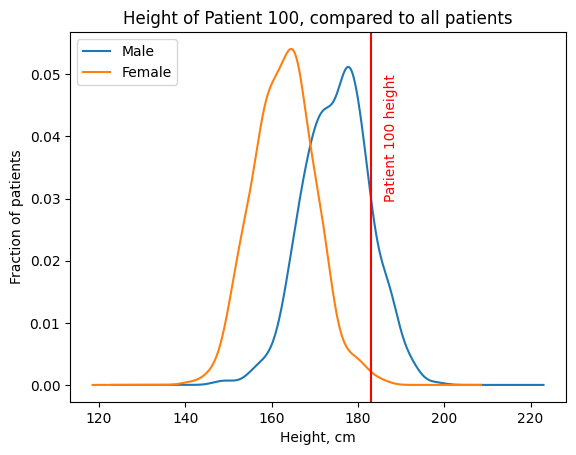

In [30]:
# Continue -- Where does Patient_ID = 100 fit in the distribution of height of all patients?
# David Thiriot

import matplotlib.pyplot as plt

male_heights['Height'].plot(kind='kde', label='Male')
female_heights['Height'].plot(kind='kde', label='Female')
plt.title("Height of Patient 100, compared to all patients")
plt.axvline(x=p100_height, color='r')
plt.text(186, 0.03, "Patient 100 height", rotation=90, color='r')
plt.legend(loc="upper left")
plt.xlabel("Height, cm")
plt.ylabel("Fraction of patients")
plt.show()

In [31]:
# David Thiriot

c.execute('''SELECT * FROM sqlite_master;
''')

colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
#df

In [32]:
# Alex Bordanca
# Calculate BMI plot for Male/female
import matplotlib.pyplot as plt

c.execute('''
select Last_height, Last_weight, pid.Biol_sex
from Patient_vitals
join Patient_ID as pid on Patient_vitals.Patient_ID = pid.Patient_ID;
''')

colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df

,Last_height,Last_weight,Biol_sex
0,175.0,200.0,Male
1,155.0,197.0,Female
2,172.0,216.0,Male
3,174.0,215.0,Male
4,171.0,167.0,Female
...,...,...,...
997,172.0,206.0,Male
998,170.0,205.0,Male
999,160.0,194.0,Male
1000,163.0,165.0,Female


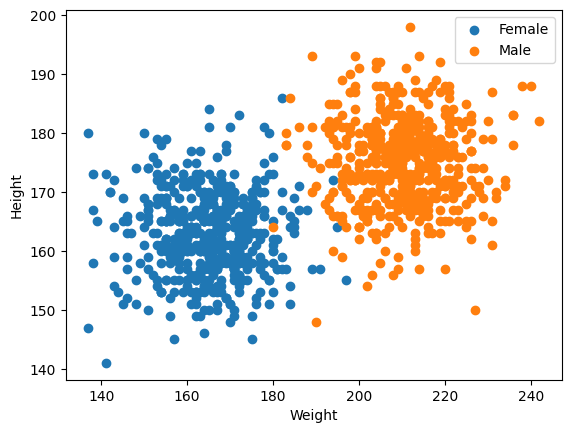

In [33]:
#continued
groups = df.groupby('Biol_sex')

# plot the data for each group
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.Last_weight, group.Last_height, label=name)

# add labels and legend
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.legend()

# show the plot
plt.show()

In [34]:
#Alex Bordanca
#Create a list of correlations between other vitals and a dummy BMI variable
c.execute('''
select * from Patient_vitals;
''')

colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df

,Patient_ID,Last_height,Last_weight,Last_heartrate,Last_systolic_BP,Last_diastolic_BP
0,1,175.0,200.0,58.0,123.0,69.0
1,2,155.0,197.0,73.0,127.0,73.0
2,3,172.0,216.0,76.0,121.0,75.0
3,4,174.0,215.0,74.0,130.0,74.0
4,5,171.0,167.0,77.0,112.0,67.0
...,...,...,...,...,...,...
997,998,172.0,206.0,64.0,127.0,76.0
998,999,170.0,205.0,69.0,128.0,79.0
999,1000,160.0,194.0,71.0,125.0,67.0
1000,1001,163.0,165.0,80.0,120.0,70.0


In [35]:
#Continued
df['BMI_dummy'] = df['Last_weight']/(df['Last_height'])
                                     

In [36]:
#continued
corr_matrix = df[df.columns[1:]].corr()['BMI_dummy'][:-1]
corr_matrix

Last_height          0.180933
Last_weight          0.906541
Last_heartrate      -0.399995
Last_systolic_BP     0.225544
Last_diastolic_BP    0.149535
Name: BMI_dummy, dtype: float64

In [37]:

c.execute('''
select Current_smoker, pf.Amount_due
from Patient_health
join Patient_finance as pf
on Patient_health.Patient_ID = pf.Patient_ID;
''')

colnames = c.description   # gather column names from a new query
colnames_list = []
for row in colnames:
    colnames_list.append(row[0])

df = pd.DataFrame(c.fetchall(), columns=colnames_list)
df
corr_matrix = df.corr()['Current_smoker'][1:]
corr_matrix

Amount_due   -0.061749
Name: Current_smoker, dtype: float64

In [38]:
# At the end of the work, close the database connection.
conn.close()